# 들어가며

**실습목표**

- OCR의 과정을 이해합니다.
- 문자인식 결과의 표현방식을 이해합니다.
- 파이썬을 통해 OCR을 사용할 수 있습니다.

**학습 목차**

- 들어가며
- 기계가 읽을 수 있나요?
- 어떤 과정으로 읽을까요?
- 딥러닝 문자인식의 시작
- 사진 속 문자 찾아내기 - detection
- 사진 속 문자 읽어내기 - recognition
- keras-ocr 써보기
- 테서랙트 써보기
- 프로젝트 : 다양한 OCR 모델 비교하기


# 기계가 읽을 수 있나요?
___
사람이 문자를 읽으려면 **문자가 있다는 것을 `인식`하고 -> 인식한 문자를 `해독`**하는 과정을 거친다. 기계가 문자를 읽는 과정도 동일하게, **문자의 존재를 `Detection`하고, 어떤 문자인지 판독하는 `Recognition`으로 나눌 수 있다.**

# 어떤 과정으로 읽나요?

---

구글 API에서는 문자 영역을 사각형으로 표현하고 우측에 `block`과 `paragraph`로 구분해서 인식 결과를 나타내고 있습니다. 구글 API가 이미지에 박스를 친 다음 박스별 텍스트의 내용을 알려준 것처럼, 문자 모델은 보통 두 단계로 이뤄진다.

1. 입력받은 사진 속에서 문자의 위치를 찾아낸다. **Text detection**
2. 찾은 문자 영역으로부터 문자를 읽어낸다. **Text recognition**

![image](https://user-images.githubusercontent.com/78291267/155649659-10aec195-b5e1-4a00-8835-69db3bfbf4a5.png)

# 딥러닝 문자인식의 시작
---

![image](https://user-images.githubusercontent.com/78291267/155650171-07b15f6a-7ff0-42b0-a5ee-fd67b9753d36.png)

LeNet은 CNN의 근본이라 할 수 있다. 1998년 우편번호나 손글씨를 읽기 위해서 만들어졌다.

[LeNet 데모페이지](http://yann.lecun.com/exdb/lenet/noisy-2.html)

> 이 데모페이지에서 Noise Resistance의 예시를 보면 문자가 노이즈, 즉 잡음에 가려져도 문자를 잘 읽는다. 이런 robust한 모델은 어떻게 만들 수 있을까?   
> 가려진 케이스에 대한 데이터를 확보하거나 Augmentation을 통해 해당 케이스에 대한 Robust를 확보한다!

# 사진 속 문자 찾아내기 -detection
---

![image](https://user-images.githubusercontent.com/78291267/155650575-f9dd8f1d-b74f-4b40-bcce-f6ab1c3dc9b8.png)

[출처: <https://www.semanticscholar.org/paper/End-To-End-Text-Detection-Using-Deep-Learning-Ibrahim/6d8584a900bd77afec55921c2d2d1cb6f1244b25/figure/0>]

사진 속 문자를 찾는 최근 딥러닝 모델은 일반적인 Object Detection 방식으로 접근한다. 이미지 속에서 물체를 찾는 딥러닝 모델에게 문자를 찾도록 학습시킨 것이다.

이 방식에는 Regression 방식이나 segmentation 방식이 있다. **Regression**은 기준으로 하는 박스에 대비해 문자의 박스가 얼마나 차이나는지를 학습하고, **Segmentation**은 픽셀 단위로 해당 픽셀이 문자를 표현하는지 분류하는 문제라고 볼 수 있다.

# 사진 속 문자 읽어내기 - recognition
---

![image](https://user-images.githubusercontent.com/78291267/155650886-906f44b7-dc77-4c54-b00a-84ae24cc49f7.png)

[출처: ICDAR (<https://rrc.cvc.uab.es/?ch=4&com=tasks>)]

문자 인식은 사진 속 문자를 검출하는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정이다. 아래 그림은 ICDAR15라는 OCR 데이터셋에서 단위 단위로 잘린 이미지이다. 문자 인식 모델은 이렇게 작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아낸다.

![image](https://user-images.githubusercontent.com/78291267/155651043-a19a23f8-4c5e-4774-beba-e312244327b2.png)

[출처: Ibrahim, Ahmed Sobhy Elnady. End-To-End Text Detection Using Deep Learning. Diss. Virginia Tech, 2017. (https://arxiv.org/abs/1507.05717)]

이렇게 검출 결과로부터 문자를 인식한 이후에는 구글 API 결과처럼 사진 속 영역에 표식를 하고 그 영역에 어떤 문자가 적혀있는지 알 수 있는 ocr 시스템이 된다.

# Keras-OCR 써보기
___

구글 API를 쓰듯이 OCR를 데모로 써볼 수 있지만 직접 **OCR 모델을 만들어 돌려보고 싶을 땐 어떻게 해야할까?** 텐서플로우를 기반으로 OCR을 직접 돌려보자.

`keras-ocr`은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 한다. 공식 문서에도 나와 있듯, 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용한다.

`keras_ocr`과 인식 결과의 시각화를 위한 `matplotlib.pyplot`을 불러온다. 검출기와 인식기를 위한 가중치 하나씩을 불러온다.


In [5]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


만들어준 파이프라인의 `recognize()`에 이미지를 넣어준다.

In [6]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

내부적으로 `reccognize()`는 검출기와 인식기를 두고, 검출기로 바운딩 박스를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거친다.(검출기:바운딩 박스 검출 -> 인식기: 박스로부터 문자 인식)



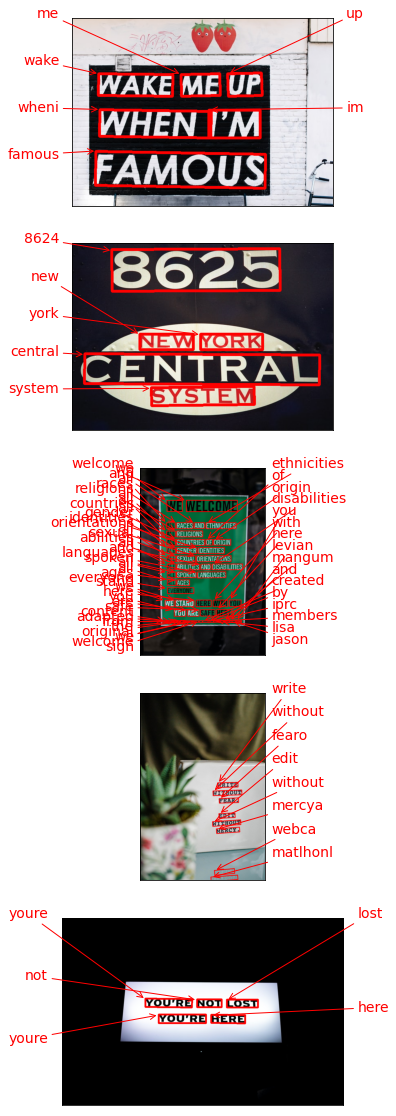

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)


# 테서랙트 써보기
___

![image](https://user-images.githubusercontent.com/78291267/155651806-7d06d8c7-a808-4539-91df-522f90c9ce8a.png)

태서랙트 라이브러리로 이미지에서 문자를 인식해보자.

## 1) 테서랙트 설치하기
---

```python

$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev

```

## 2) python wrapper 설치하기
---

`Pytesseract`는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용하도록 해주는 래퍼 라이브러리이다. 파이썬 내 컴퓨터에 설치된 태서렉트 엔진의 기능을 쓰게 해준다.

- [Pytesseract](https://pypi.org/project/pytesseract/)
- [위키백과: 래퍼 라이브러리](https://pypi.org/project/pytesseract/)

## 3) 테서렉트로 문자 검출하고 이미지 자르기(detection)
---

태서랙트를 사용함면 한 번에 이미지 내의 문자 검출/인식이 가능하다. 우리는 **OCR이 이뤄지는 전체 과정을 거쳐보기 위해** 검출만 먼저 해 보자.



In [23]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image06.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

위에서 구현한 `crop_word_regions()`함수는 우리가 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수이다.

기본적으로 `pytesseract.image_to_data()`를 사용한다. 파이썬에서 편하게 사용하도록 `pytesseract`의 `output`을 사용해서 결괏값의 형식을 딕셔너리 형식으로 설정해준다. 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 된다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL 또는 opencv 라이브러리를 사용해 잘라서 `cropped_image_path_list`에 담아 리턴한다.

## 4) 테서랙트로 잘린 이미지에서 단어 인식하기

이제 문자인식을 해보자. 바운딩 박스별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과로 나오는 `immage_to_string()`을 사용하자.

이렇게 인식된 결과가 실제와 같은지도 확인하자.

In [26]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'    
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

“All Tines of the road and fence “vanish ”

Renta:

The road on

ishing

PTR

ot

WLI SE,

hee

other

‘pos

me She

t Pree

rig hit

i>

ia

a

lescending

\D.P.),

Te}

Phe

depth

ot

.

ic”

WwirttsS

of

> telegraph

poles

anal

Poa

ot

irces

arises

ry

thier

read

down

i

4

POE

LF

nr

rhs.

lines.

a rensaes

ae

dealt

with

core

r Presse

principles

he

res

ot

t hye

yeT

vanish

ii}

oS

POL

rohit

,ty

hhhe

Se ea

Ls

ihe

under

shy

<.

:

~OTNL

ehe

the

sari

line

i.

the

>

a ee

chor t

bathing

houres

1“

ht

at

the

child

ihe

tront

riect

hac he

(i

dite

horrzon.

lit.

Note

vonverpence

of

all

ines

ot

the

Tr

icy

awe

(centre

yf

YI

iT

eye)

Notice

oth

art

direction

mt

thre

sHaclows

which

rhe

atc

that

the

SUtth

i ~

fairly

low,

Por)

the

night,

d

the s

lor

iy.

seen nll ication

of

# 프로젝트: 다양한 OCR 모델 비교하기
---

지금까지 Google OCR api, keras-ocr, Tesseract 총 3가지의 OCR기능을 활용해보았다.

이번 프로젝트는 위 3가지를 검증해보는 것이다. OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정하자.

In [27]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## step1. 검증용 데이터셋 준비

OCR관련해서 오늘 다루었던 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었다.

## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

### keras-ocr

In [28]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [33]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
    'https://user-images.githubusercontent.com/78291267/155657090-ce8ab6f3-840b-4cb6-8186-913bf0b1040d.png',
    'https://user-images.githubusercontent.com/78291267/155657100-08b4cf49-3b8c-426d-b48f-5df9de3e31ef.png',
    'https://user-images.githubusercontent.com/78291267/155657103-cd26350a-38f0-40da-b109-e2f3e7dd1c31.png',
    'https://user-images.githubusercontent.com/78291267/155657105-9fd10f6c-bc7a-4405-a272-a02835f6b459.jpg',
    'https://user-images.githubusercontent.com/78291267/155657108-8473fb43-c920-4c6d-8d78-c4dbcf516ec0.jpg',
    'https://user-images.githubusercontent.com/78291267/155657111-10f5ab27-ca45-46f0-a521-f1be38bd9c3d.jpg',
    'https://user-images.githubusercontent.com/78291267/155657114-9c638006-e6c2-4888-b9d3-2759d0400aeb.png',

]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

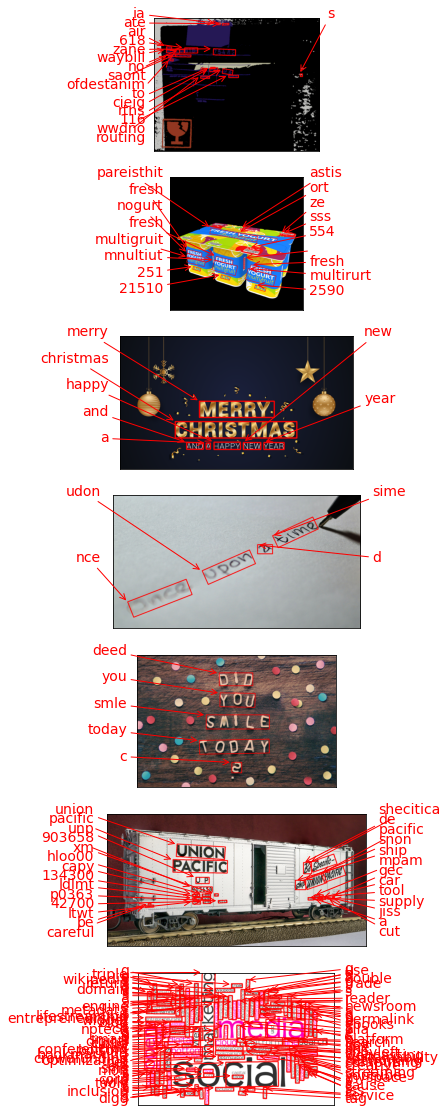

In [34]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 테서랙트 써보기

In [41]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [88]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'    
    texts = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
        data = recognized_data['text'].split("\x0c")[0]
        texts.append(data)
    print(texts)    
    print("Done")


In [79]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
for i in range(1, 7):
    img_file_path = work_dir + '/' + str(i)+ '.png'
    print(i)
    
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    
    # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
    recognize_images(cropped_image_path_list)
    

1
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png

— ”


REGISTERED

HONG

KONG

Done
2
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
=

LM y

“yy

t77;

Sg

Done
3
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
i eta a

a Bo

WV paelewg

..

CARISTMAS

AN WNG

A

HAPPY

NE VV

YEAR

4

ea

Done
4
/aiffel/aiffel

## Step3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### keras-ocr 테스트 결과

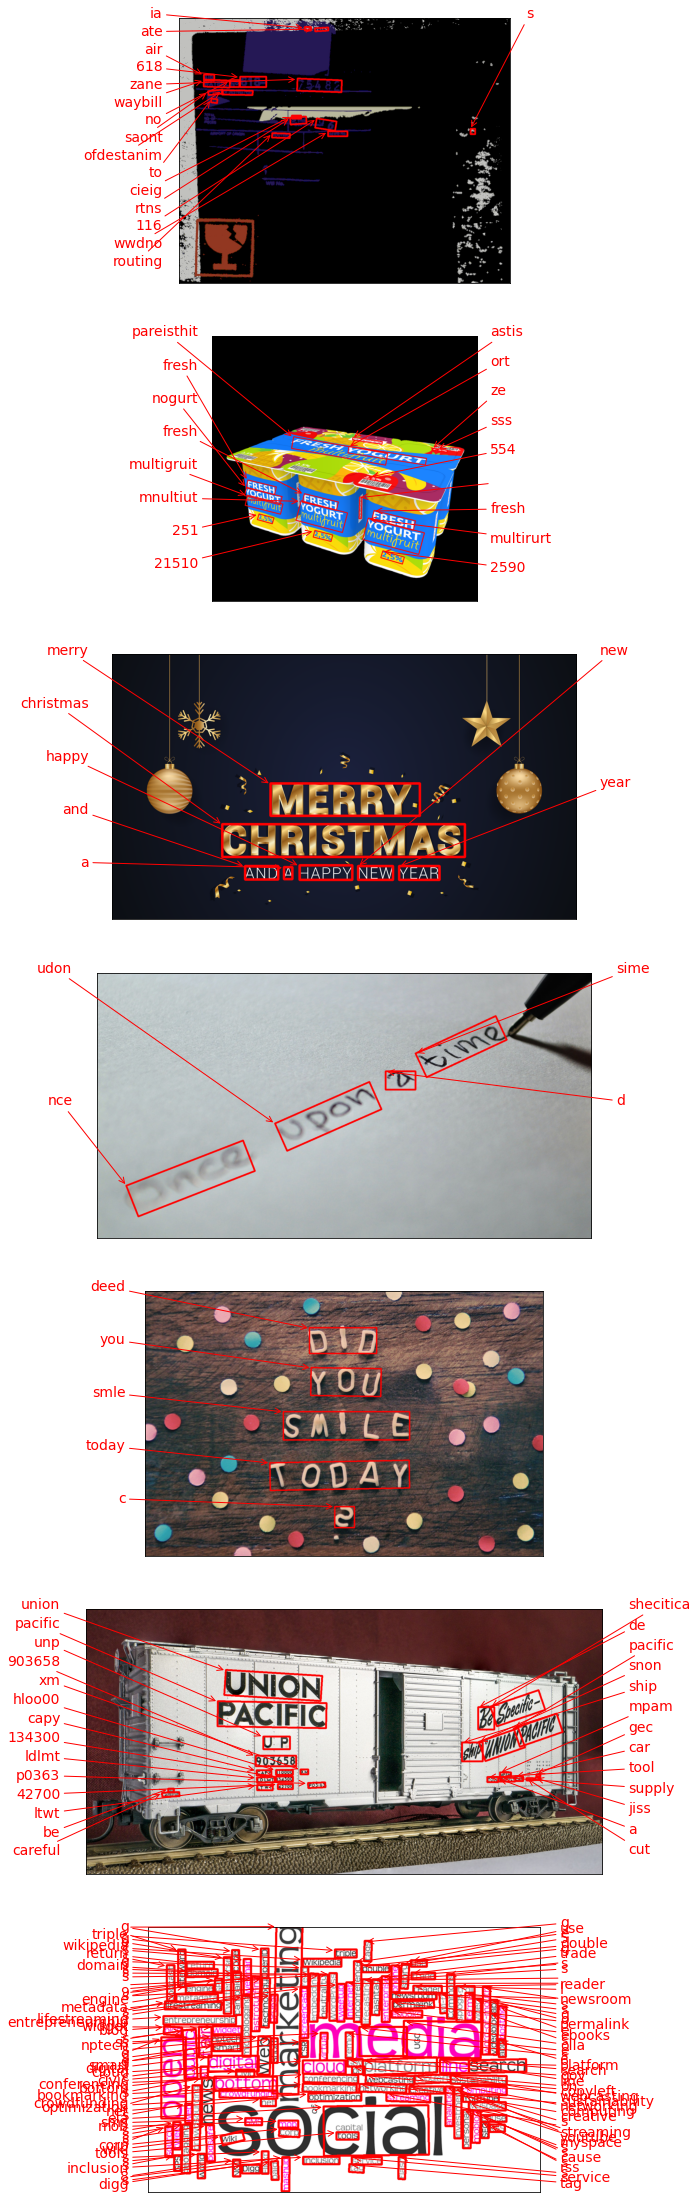

In [189]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 태서렉트 테스트 결과

In [187]:
# 이미지 인식 후 시각화까지 하는 함수

def recognize_images_png(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'    
    texts = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        data = recognized_data['text']
        texts.append(data)
    
    # 이미지 출력
    img_file_path = work_dir + '/' + str(i)+ '.png'
    img = plt.imread(img_file_path)
    plt.imshow(img)
    plt.show()
    
    
    # 분리시켜 인식한 이미지 내 단어 전체를 출력시킴
    print("----------output text--------- ")
    for j in texts:
        print_text = ""
        print_text += j.split("\n")[0]
        print(print_text, end=" ")
    
    print("\n")
    
    

def recognize_images_jpg(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'    
    texts = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        data = recognized_data['text']
        texts.append(data)
    
    # 이미지 출력
    img_file_path = work_dir + '/' + str(i)+ '.jpg'
    img = plt.imread(img_file_path)
    plt.imshow(img)
    plt.show()
    
    
    # 분리시켜 인식한 이미지 내 단어 전체를 출력시킴
    print("----------output text--------- ")
    for j in texts:
        print_text = ""
        print_text += j.split("\n")[0]
        print(print_text, end=" ")
    
    print("\n")
        
    

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png


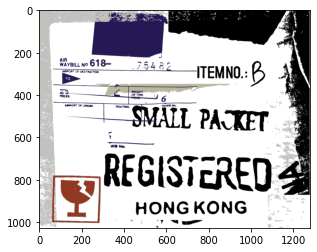

----------output text--------- 
 — ”  REGISTERED HONG KONG 

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png


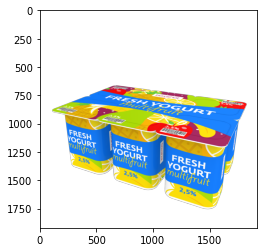

----------output text--------- 
= LM y “yy t77; Sg 

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png


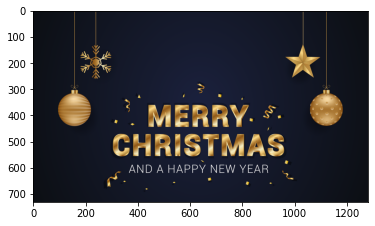

----------output text--------- 
i eta a a Bo WV paelewg .. CARISTMAS AN WNG A HAPPY NE VV YEAR 4 ea 

/aiffel/aiffel/ocr_python/0000.png


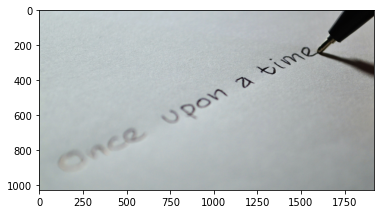

----------output text--------- 
. a a weg 

/aiffel/aiffel/ocr_python/0000.png


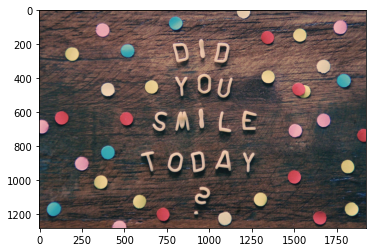

----------output text--------- 
 

/aiffel/aiffel/ocr_python/0000.png


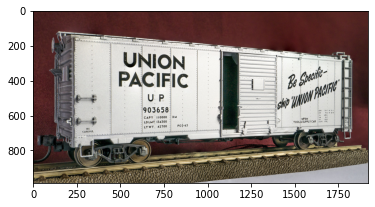

----------output text--------- 
 



In [188]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
for i in range(1, 4):
    img_file_path = work_dir + '/' + str(i)+ '.png'
    
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    
    # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
    recognize_images_png(cropped_image_path_list)
    
    
for i in range(4, 7):
    img_file_path = work_dir + '/' + str(i)+ '.jpg'
    
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    
    # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
    recognize_images_jpg(cropped_image_path_list)    

## Step4. 결과 분석과 결론 제시

우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

keras-ocr에서 더 잘 인식을 하는 것 같다. 태서렉트의 경우, 우편물 분류작업에서 인식을 잘 하였음을 확인하였다. 우편물 수집을 할 때는 태서렉트를 사용하는 것이 나을 것 같고, 정형화된 텍스트를 인식하기 위해서는 keras-ocr이 나을 것 같다. 따라서 최종적으로, keras-ocr을 ocr인식 프로젝트의 모델로 채택하였다.


- 평가기준에 부합하는 테스트 데이터 특징: `인스타나 페이스북, 트위터, 유튜브 등의 썸네일로 올라오는 이미지`들에 담긴 텍스트
- 목표로 하는 서비스: 해당 데이터들을 학습하고, 콘텐츠 제작자가 올릴 영상을 input으로 제공하면 썸네일을 만들어주는 서비스를 착안하였다. 썸네일에 따라서 조회수, 재생 시간 등이 달라진다. 특히 조회수는 콘텐츠 제작자에게 있어 중요한 변수이므로, OCR을 활용해 썸네일을 잘 만들어 준다면 유용한 서비스가 될 것이다.


# 회고

1. 느낀점

OCR 프로젝트를 실제로 해보게 되어 재미있었다. 나만의 손글씨를 인식하는 OCR프로젝트도 시도해보면 좋을 것이라고 생각한다.

2. 어려웠던 점, 해결 방안

프로젝트를 하는 부분에서 파일경로를 for문을 통해 불러오기, 파일 형식에 맞게 처리를 해주기가 어려웠다. img_file_path를 반복문을 통해 숫자를 넣어줌으로써 첫 번째 문제를 해결했지만, 두 번째 문제는 원하던 대로 해결하지 못하였다. 그래서 png, jpg가 들어오는 경우 두 가지를 분리하여 함수로 만들어 처리하였다.

